In [83]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
import plotly.express as px
import plotly.graph_objects as go



# Data Import

In [84]:
cdc = pd.read_csv('creditcard.csv')
cdc.info()
cdc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [85]:
cdc.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Dealing with class imbalance

In [115]:




def pie_chart_binary(data, title='Fraud vs Non-Fraud'):
    labels = 'Non-Fraud', 'Fraud'

    # if data is Series object then use value_counts()
    if isinstance(data, pd.Series):
        sizes = data.value_counts()
    
    # if data is DataFrame object then use Class column
    elif isinstance(data, pd.DataFrame):
        sizes = [len(data[data.Class == 0]), len(data[data.Class == 1])]

    # create plotly pie chart
    fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)])
    fig.update_layout(title_text=title)
    #title in the middle
    fig.update_layout(title_x=0.5)

    #legend close to the pie chart
    fig.update_layout(legend=dict(x=0.7))
    fig.show()
    

pie_chart_binary(cdc)

In [87]:
#Based on the above pie chart, we can see that the data is highly imbalanced. We will need to use SMOTE to balance the data.

#copy the bacic data into a new dataframe
cdc2 = cdc.copy()

X = cdc2.drop(['Time', 'Amount', 'Class'], axis=1)
y = cdc2['Class']

# split the data into training, validation, and test sets
# we will use 60% of the data for training, 20% for validation, and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=101)

# scale the data using StandardScaler
# we will fit the scaler to the training data and then use it to transform the training, validation, and test sets

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# save the original data for later use
X_train_org = X_train
y_train_org = y_train

X_val_org = X_val
y_val_org = y_val

X_test_org = X_test
y_test_org = y_test

# SMOTE  (Synthetic Minority Oversampling Technique)

Advantages:

- Simple and easy to implement
- Improves the performance of machine learning models on imbalanced datasets
- Can handle various types of data, including numerical and categorical


Disadvantages:

- Can generate synthetic data points that are very similar to existing data points, leading to overfitting
- May not be effective for datasets with complex class distributions

In [88]:
# compate before and after SMOTE to see the difference 


print('Before OverSampling, the shape of train_X: {}'.format(X_train_org.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train_org.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train_org==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train_org==0)))
print("")

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=101)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, the shape of train_X: (170883, 28)
Before OverSampling, the shape of train_y: (170883,) 

Before OverSampling, counts of label '1': 296
Before OverSampling, counts of label '0': 170587

After OverSampling, the shape of train_X: (170883, 28)
After OverSampling, the shape of train_y: (170883,) 

After OverSampling, counts of label '1': 296
After OverSampling, counts of label '0': 170587


In [116]:
# visualize the data after SMOTE

pie_chart_binary(y_train_smote, title='Fraud vs Non-Fraud after SMOTE')

# GAN (Generative Adversarial Network)


Advantages:

- Can generate realistic and diverse synthetic data points
- Can handle various types of data, including images, audio, and text
- Can improve the generalization of machine learning models


Disadvantages:

- More complex and difficult to implement than SMOTE
- Require a large amount of training data
- Sensitive to the choice of hyperparameters
- Can generate synthetic data that does not accurately represent the underlying data distribution.

In [90]:
from ctgan import CTGAN

# the model was trained on 100 epochs in Google Colab with GPU
ctgan = CTGAN.load('ctgan_100epoch_model_2.pkl')
X_train_gan = ctgan.sample(X_train_org.shape[0])

/home/blackcerberus/.local/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning:

Trying to unpickle estimator BayesianGaussianMixture from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [91]:
import wandb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

def log_metrics(model_name, split_name, y_true, y_pred, y_proba=None):
    """
    Logs classification metrics to a WandB table.
    
    Arguments:
    - model_name (str): Name of the model being evaluated.
    - split_name (str): Name of the dataset being evaluated (e.g. "train", "val", "test").
    - y_true (array-like): True class labels for the samples.
    - y_pred (array-like): Predicted class labels for the samples.
    - y_proba (array-like, optional): Predicted probabilities for the positive class.
    """
    # Calculate metrics and create a df that can be converted to a WandB table
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

    if y_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_proba)

    metrics_df = pd.DataFrame(metrics, index=[0])
    my_table = wandb.Table(dataframe=metrics_df)

    # Log the metrics table to WandB
    wandb.log({f"{model_name} {split_name} ": my_table})

    # plot the confusion matrix

    #log metric to chart
    wandb.log({f"{model_name} {split_name} accuracy": metrics['accuracy']})
    wandb.log({f"{model_name} {split_name} precision": metrics['precision']})
    wandb.log({f"{model_name} {split_name} recall": metrics['recall']})
    wandb.log({f"{model_name} {split_name} f1": metrics['f1']})
    if y_proba is not None:
       wandb.log({f"{model_name} {split_name}": metrics['roc_auc']})
    else:
       wandb.log({f"{model_name} {split_name}": 'N/A'})
    


def log_model(model, name, epoch=0):
    # Log the model as a pickle file to WandB
    with open(f"{name}_{epoch}.pickle", "wb") as f:
        pickle.dump(model, f)
    artifact = wandb.Artifact(name=name, type='model')
    artifact.add_file(f"{name}_{epoch}.pickle")
    wandb.log_artifact(artifact)
    print(f"Model '{name}_{epoch}' logged to WandB.")



# Reduction model - Random Forest

In [92]:
import wandb

wandb.login()


True

Model 'Random_Forest_original_data_0' logged to WandB.
Model 'Random_Forest_SMOTE_data_0' logged to WandB.
Model 'Random_Forest_GAN_data_0' logged to WandB.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.76      0.70      0.73        93

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



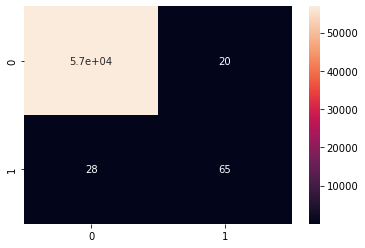

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.32      0.78      0.45        93

    accuracy                           1.00     56962
   macro avg       0.66      0.89      0.73     56962
weighted avg       1.00      1.00      1.00     56962



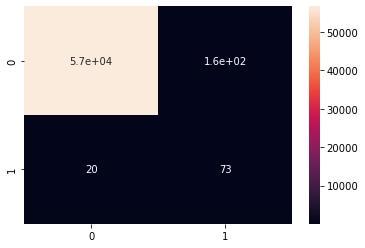

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.00      0.00      0.00        93

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



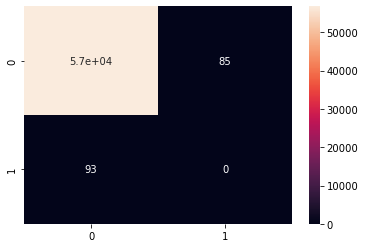

Random_Forest val accuracy,▁
Random_Forest val f1,▁
Random_Forest val precision,▁
Random_Forest val recall,▁
Random_Forest_GAN_data val accuracy,▁
Random_Forest_GAN_data val f1,▁
Random_Forest_GAN_data val precision,▁
Random_Forest_GAN_data val recall,▁
Random_Forest_SMOTE_data val accuracy,▁
Random_Forest_SMOTE_data val f1,▁
Random_Forest_SMOTE_data val precision,▁


In [93]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
import wandb


# Initialize wandb
wandb.init(project="CC_Fraud_Detection_RF")

n_estimators = 1
random_state = 42

# Log the hyperparameters to wandb
config = wandb.config
config.n_estimators = n_estimators
config.random_state = random_state

# Create Random Forest classifier 
clf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

# Fit the classifier to original data
clf.fit(X_train_org, y_train_org)
y_pred_org = clf.predict(X_val_org)
log_metrics("Random_Forest", "val", y_val_org, y_pred_org)
log_model(clf, "Random_Forest_original_data")

# Create Random Forest classifier 
clf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

# Fit the classifier to SMOTE data
clf.fit(X_train_smote, y_train_smote)
y_pred_smote = clf.predict(X_val_org)
log_metrics("Random_Forest_SMOTE_data", "val", y_val_org, y_pred_smote)
log_model(clf, "Random_Forest_SMOTE_data")

# gan has only 2 features
clf_gan = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

# Fit the classifier to GAN data
clf_gan.fit(X_train_gan, y_train_org)
y_pred_gan = clf_gan.predict(X_val_org[:,:2])
log_metrics("Random_Forest_GAN_data", "val", y_val_org, y_pred_gan)
log_model(clf, "Random_Forest_GAN_data")


# evaluation original data
print(classification_report(y_val_org, y_pred_org))
sns.heatmap(confusion_matrix(y_val_org, y_pred_org),annot=True)
plt.show()

print("-"*50)

# evaluation SMOTE data
print(classification_report(y_val_org, y_pred_smote))
sns.heatmap(confusion_matrix(y_val_org, y_pred_smote),annot=True)
plt.show()


print("-"*50)

#evaluation GAN data
print(classification_report(y_val_org, y_pred_gan))
sns.heatmap(confusion_matrix(y_val_org, y_pred_gan),annot=True)
plt.show()


# Finish the wandb run
wandb.finish()




In [94]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
import wandb
import seaborn as sns
import matplotlib.pyplot as plt


def train_random_forest(X_train, y_train, X_val, y_val, dataset_name):
    
    labels = ['No Fraud', 'Fraud']
    n_estimators = 1
    random_state = 42

    # Log the hyperparameters to wandb
    config = wandb.config
    config.n_estimators = n_estimators
    config.random_state = random_state

    # Create Random Forest classifier 
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    # Fit the classifier to data
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    log_metrics("Random_Forest", dataset_name, y_val, y_pred)
    log_model(clf, f"Random_Forest_{dataset_name}")

    # evaluation
    print(classification_report(y_val, y_pred, target_names=labels))
    sns.heatmap(confusion_matrix(y_val, y_pred),annot=True)
    plt.show()

    print("-"*50)


Random Forest on original data
Model 'Random_Forest_original_data_0' logged to WandB.
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56869
       Fraud       0.76      0.70      0.73        93

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



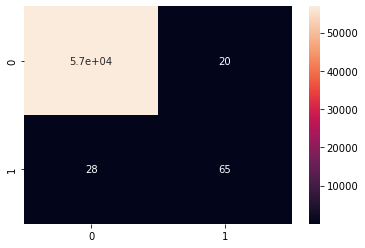

--------------------------------------------------
Random Forest on SMOTE data
Model 'Random_Forest_SMOTE_data_0' logged to WandB.
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56869
       Fraud       0.32      0.78      0.45        93

    accuracy                           1.00     56962
   macro avg       0.66      0.89      0.73     56962
weighted avg       1.00      1.00      1.00     56962



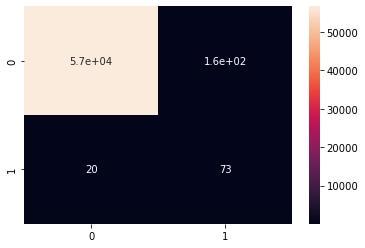

--------------------------------------------------
Random Forest on GAN data
Model 'Random_Forest_GAN_data_0' logged to WandB.
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56869
       Fraud       0.00      0.00      0.00        93

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



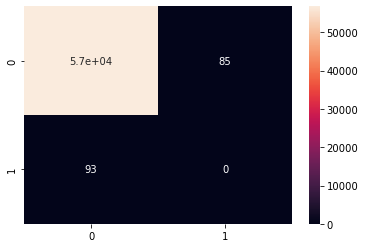

--------------------------------------------------


Random_Forest GAN_data accuracy,▁
Random_Forest GAN_data f1,▁
Random_Forest GAN_data precision,▁
Random_Forest GAN_data recall,▁
Random_Forest SMOTE_data accuracy,▁
Random_Forest SMOTE_data f1,▁
Random_Forest SMOTE_data precision,▁
Random_Forest SMOTE_data recall,▁
Random_Forest original_data accuracy,▁
Random_Forest original_data f1,▁
Random_Forest original_data precision,▁


In [95]:
# Initialize wandb
wandb.init(project="CC_Fraud_Detection_RF")

print("Random Forest on original data")
train_random_forest(X_train_org, y_train_org, X_val_org, y_val_org, "original_data")

print("Random Forest on SMOTE data")
train_random_forest(X_train_smote, y_train_smote, X_val_org, y_val_org, "SMOTE_data")

print("Random Forest on GAN data")
train_random_forest(X_train_gan, y_train_org, X_val_org[:,:2], y_val_org, "GAN_data")

# Finish the wandb run
wandb.finish()

# Recognition model - Naive Bayes 

In [96]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import wandb

def train_naive_bayes(X_train, y_train, X_val, y_val, dataset_name):
    
    labels = ['No Fraud', 'Fraud']
    # Create Naive Bayes classifier
    clf = GaussianNB()

    # Fit the classifier to data
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    log_metrics("Naive_Bayes", dataset_name, y_val, y_pred)
    log_model(clf, f"Naive_Bayes_{dataset_name}")

    # evaluation
    print(classification_report(y_val, y_pred, target_names=labels))
    sns.heatmap(confusion_matrix(y_val, y_pred),annot=True)
    plt.show()

    print("-"*50)


Naive Bayes on original data
Model 'Naive_Bayes_original_data_0' logged to WandB.
              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56869
       Fraud       0.06      0.83      0.11        93

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



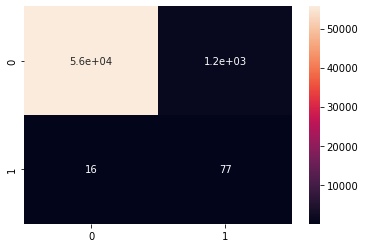

--------------------------------------------------
Naive Bayes on SMOTE data
Model 'Naive_Bayes_SMOTE_data_0' logged to WandB.
              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56869
       Fraud       0.05      0.86      0.10        93

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.98      0.99     56962



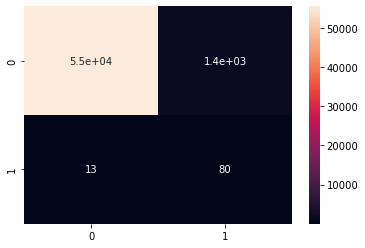

--------------------------------------------------
Naive Bayes on GAN data


/home/blackcerberus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Model 'Naive_Bayes_GAN_data_0' logged to WandB.
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56869
       Fraud       0.00      0.00      0.00        93

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/home/blackcerberus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/blackcerberus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/blackcerberus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



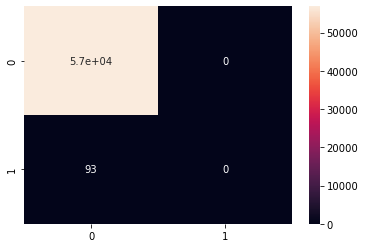

--------------------------------------------------


Naive_Bayes GAN_data accuracy,▁
Naive_Bayes GAN_data f1,▁
Naive_Bayes GAN_data precision,▁
Naive_Bayes GAN_data recall,▁
Naive_Bayes SMOTE_data accuracy,▁
Naive_Bayes SMOTE_data f1,▁
Naive_Bayes SMOTE_data precision,▁
Naive_Bayes SMOTE_data recall,▁
Naive_Bayes original_data accuracy,▁
Naive_Bayes original_data f1,▁
Naive_Bayes original_data precision,▁


In [97]:

wandb.init(project="CC_Fraud_Detection_NB")

# train on original data
print("Naive Bayes on original data")
train_naive_bayes(X_train_org, y_train_org, X_val_org, y_val_org, "original_data")

# train on SMOTE data
print("Naive Bayes on SMOTE data")
train_naive_bayes(X_train_smote, y_train_smote, X_val_org, y_val_org, "SMOTE_data")

# train on GAN data
print("Naive Bayes on GAN data")
train_naive_bayes(X_train_gan, y_train_org, X_val_org[:,:2], y_val_org, "GAN_data")

# Finish the wandb run
wandb.finish()

# Anomaly model -  Isolation Forest


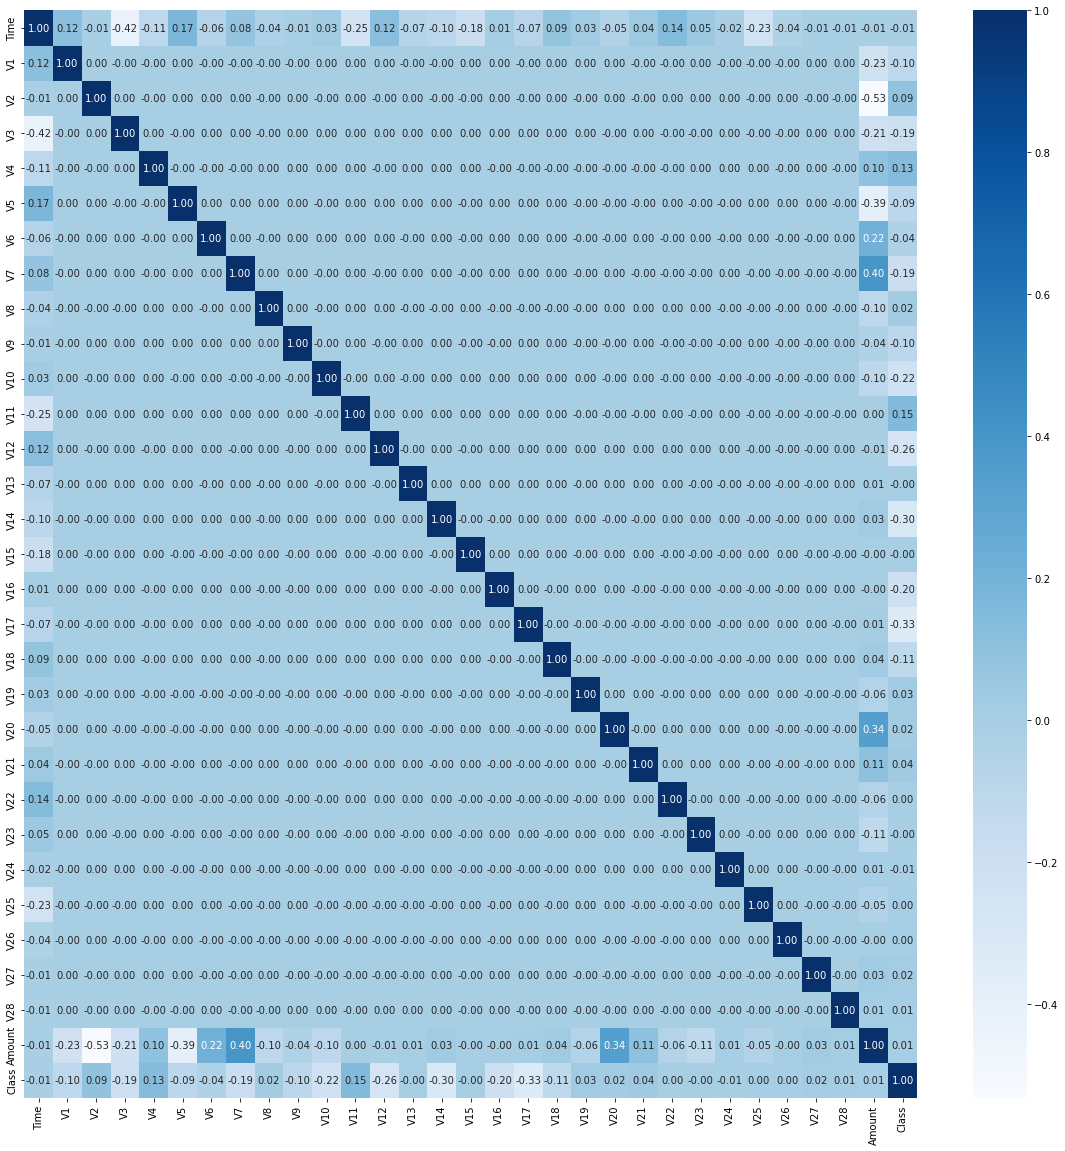

In [98]:
# Correlation matrix
corr = cdc.corr()
top_corr_features = corr.index

# plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=plt.cm.Blues, annot=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [99]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import wandb



def predict_binary(X, model):
    """
    Predicts the class of the data
    """
    yhat = model.predict(X)
    yhat = [1 if y == -1 else 0 for y in yhat]
    return yhat

def train_isolation_forest(X_train, y_train, X_val, y_val, dataset_name):
    #Log hyperparameters
    config = wandb.config
    config.n_estimators = 100
    config.max_samples = 'auto'
    config.contamination = 'auto'
    config.random_state = 42

    # Initialize Isolation Forest model
    model = IsolationForest(n_estimators=config.n_estimators,
                            max_samples=config.max_samples,
                            contamination=config.contamination,
                            random_state=config.random_state)

    # Fit the model to data
    model.fit(X_train, y_train)
    y_pred = predict_binary(X_val, model)
    log_metrics("Isolation_Forest", dataset_name, y_val, y_pred)
    log_model(model, f"Isolation_Forest_{dataset_name}")

    # evaluation
    labels = ['Legitimate', 'Fraudulent']
    print(classification_report(y_val, y_pred, target_names=labels))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True)
    plt.show()

    print("-"*50)

    


Isolation Forest on original data
Model 'Isolation_Forest_original_data_0' logged to WandB.
              precision    recall  f1-score   support

  Legitimate       1.00      0.97      0.98     56869
  Fraudulent       0.04      0.77      0.07        93

    accuracy                           0.97     56962
   macro avg       0.52      0.87      0.53     56962
weighted avg       1.00      0.97      0.98     56962



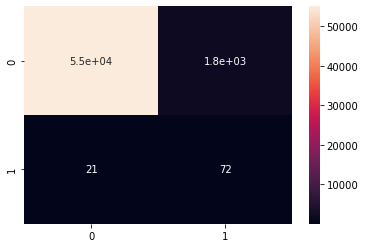

--------------------------------------------------
Isolation Forest on SMOTE data
Model 'Isolation_Forest_SMOTE_data_0' logged to WandB.
              precision    recall  f1-score   support

  Legitimate       1.00      0.99      0.99     56869
  Fraudulent       0.04      0.25      0.07        93

    accuracy                           0.99     56962
   macro avg       0.52      0.62      0.53     56962
weighted avg       1.00      0.99      0.99     56962



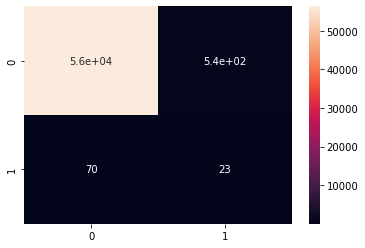

--------------------------------------------------
Isolation Forest on GAN data
Model 'Isolation_Forest_GAN_data_0' logged to WandB.
              precision    recall  f1-score   support

  Legitimate       1.00      0.88      0.93     56869
  Fraudulent       0.01      0.70      0.02        93

    accuracy                           0.88     56962
   macro avg       0.50      0.79      0.48     56962
weighted avg       1.00      0.88      0.93     56962



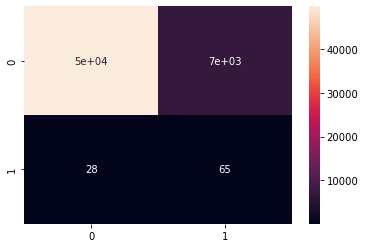

--------------------------------------------------


Isolation_Forest GAN_data accuracy,▁
Isolation_Forest GAN_data f1,▁
Isolation_Forest GAN_data precision,▁
Isolation_Forest GAN_data recall,▁
Isolation_Forest SMOTE_data accuracy,▁
Isolation_Forest SMOTE_data f1,▁
Isolation_Forest SMOTE_data precision,▁
Isolation_Forest SMOTE_data recall,▁
Isolation_Forest original_data accuracy,▁
Isolation_Forest original_data f1,▁
Isolation_Forest original_data precision,▁


In [100]:
# Initialize wandb
wandb.init(project="CC_Fraud_Detection_IF")

# train on original data
print("Isolation Forest on original data")
train_isolation_forest(X_train_org, y_train_org, X_val_org, y_val_org, "original_data")

# train on SMOTE data
print("Isolation Forest on SMOTE data")
train_isolation_forest(X_train_smote, y_train_smote, X_val_org, y_val_org, "SMOTE_data")

# train on GAN data
print("Isolation Forest on GAN data")
train_isolation_forest(X_train_gan, y_train_org, X_val_org[:,:2], y_val_org, "GAN_data")

wandb.finish()

In [101]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# Load the pickle files for each model
models = [
'Naive_Bayes_original_data_0.pickle',
'Naive_Bayes_SMOTE_data_0.pickle',
'Naive_Bayes_GAN_data_0.pickle',
'Random_Forest_original_data_0.pickle',
'Random_Forest_SMOTE_data_0.pickle',
'Random_Forest_GAN_data_0.pickle']

# Load the models
loaded_models = []
for model_file in models:
    with open(model_file, 'rb') as f:
        model = pickle.load(f)
        loaded_models.append(model)


# Create an ensemble of models using bagging
bagging = BaggingClassifier(VotingClassifier(estimators=[('model_'+str(i), model) for i, model in enumerate(loaded_models)]),
                            n_estimators=10, max_samples=0.8, max_features=0.8)

# Create an ensemble of models using stacking
stacking = VotingClassifier(estimators=[('model_'+str(i), model) for i, model in enumerate(loaded_models)], voting='hard')

# Define the ensemble methods to evaluate
ensemble_methods = [bagging, stacking] 

# K-fold validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute the cross-validation scores for each ensemble method
scores = []
for method in ensemble_methods:
    method_scores = cross_val_score(method, X_train, y_train, cv=kfold)
    scores.append((method, np.mean(method_scores)))

# Select the best 2 models based on the mean cross-validation score
best_models = sorted(scores, key=lambda x: x[1], reverse=True)[:2]




In [102]:
best_models[0][0]

BaggingClassifier(estimator=VotingClassifier(estimators=[('model_0',
                                                          GaussianNB()),
                                                         ('model_1',
                                                          GaussianNB()),
                                                         ('model_2',
                                                          GaussianNB()),
                                                         ('model_3',
                                                          RandomForestClassifier(n_estimators=1,
                                                                                 random_state=42)),
                                                         ('model_4',
                                                          RandomForestClassifier(n_estimators=1,
                                                                                 random_state=42)),
                                                         ('model_5',
                                                          RandomForestClassifier(n_estimators=1,
                                                                                 random_state=42))]),
                  max_features=0.8, max_samples=0.8)

In [103]:
best_models[1][0]

VotingClassifier(estimators=[('model_0', GaussianNB()),
                             ('model_1', GaussianNB()),
                             ('model_2', GaussianNB()),
                             ('model_3',
                              RandomForestClassifier(n_estimators=1,
                                                     random_state=42)),
                             ('model_4',
                              RandomForestClassifier(n_estimators=1,
                                                     random_state=42)),
                             ('model_5',
                              RandomForestClassifier(n_estimators=1,
                                                     random_state=42))])

In [104]:
for model, score in best_models:
    print(f"{model.__class__.__name__} ROC AUC score: {score:.4f}")


BaggingClassifier ROC AUC score: 0.9993
VotingClassifier ROC AUC score: 0.9992


In [105]:
#Load the best Isolation Forest model, Isolation Forest on SMOTE data

with open('Isolation_Forest_SMOTE_data_0.pickle', 'rb') as f:
    best_isolation = pickle.load(f)


def test_best_anoamly_detector(X_test, y_test, model):
     y_pred = predict_binary(X_test, model)

     # Log the metrics
     log_metrics("Isolation_Forest", "test_data", y_test, y_pred)

     # Log the model
     log_model(model, "Isolation_Forest_test_data")

     labels = ['Legitimate', 'Fraudulent']

     print(classification_report(y_test, y_pred, target_names=labels))
     sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
     plt.show()

     print("-"*50)


In [106]:

def test_best_models(X_test, y_test, best_models):

    
    for model, score in best_models:
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)
        log_metrics(model.__class__.__name__, "test_data", y_test, y_pred)
        log_model(model, f"{model.__class__.__name__}_test_data")

        # evaluation
        labels = ['Legitimate', 'Fraudulent']
        print(classification_report(y_test, y_pred, target_names=labels))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
        plt.show()

        print("-"*50)
    


Isolation Forest on SMOTE data
Model 'Isolation_Forest_test_data_0' logged to WandB.
              precision    recall  f1-score   support

  Legitimate       1.00      0.99      0.99     56859
  Fraudulent       0.05      0.25      0.08       103

    accuracy                           0.99     56962
   macro avg       0.52      0.62      0.54     56962
weighted avg       1.00      0.99      0.99     56962



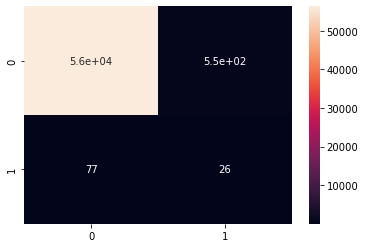

--------------------------------------------------
Best Ensemble models
Model 'BaggingClassifier_test_data_0' logged to WandB.
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56859
  Fraudulent       0.82      0.84      0.83       103

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



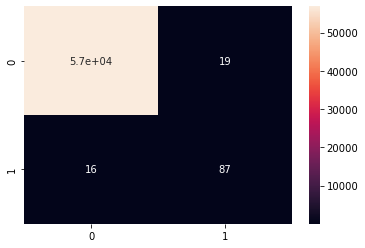

--------------------------------------------------
Model 'VotingClassifier_test_data_0' logged to WandB.
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56859
  Fraudulent       0.77      0.80      0.78       103

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



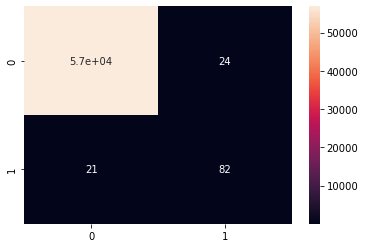

--------------------------------------------------


BaggingClassifier test_data accuracy,▁
BaggingClassifier test_data f1,▁
BaggingClassifier test_data precision,▁
BaggingClassifier test_data recall,▁
Isolation_Forest test_data accuracy,▁
Isolation_Forest test_data f1,▁
Isolation_Forest test_data precision,▁
Isolation_Forest test_data recall,▁
VotingClassifier test_data accuracy,▁
VotingClassifier test_data f1,▁
VotingClassifier test_data precision,▁


In [107]:

# Initialize wandb
wandb.init(project="CC_Fraud_Detection_FINAL")

# test the best anomaly detector
print("Isolation Forest on SMOTE data")
test_best_anoamly_detector(X_test, y_test, best_isolation)

# test the best models
print("Best Ensemble models")
test_best_models(X_test, y_test, best_models)

wandb.finish()


Ensemble methods

# Initial analysis of data

In [108]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [109]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.savefig("plots/correlation_matrix.png", dpi=300)
    plt.show()

In [110]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.savefig("plots/scatter_matrix.png", dpi=300)
    plt.show()